# Comparaison of the results before and after the abjunction of the enr model production

## 0. Configuring EcoDynElec and loading the data

In [1]:
# Autoreload imports
%load_ext autoreload
%autoreload 2

# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from ecodynelec.parameter import Parameter  # Import the class to manipulate parameters
from examples.mix_analysis.analysis_functions import format_data_0, get_metrics, plot_hourly_heatmap, plot_years, \
    plot_typical_days

In [2]:
# EcoDynElec configuration
my_config = Parameter()
my_config.freq = "H"
my_config.ctry = ['AT', 'CH', 'DE', 'FR', 'IT']
my_config.target = ['CH']  # You can put multiple targets here
# Enable this if you want to plot fig 6 (will impact the computation time - it took me 15min)
my_config.target = ['CH', 'AT', 'FR', 'DE']
my_config.data_cleaning = True
my_config.sg_imports = True
my_config.path.generation = "./mix_analysis/downloads/generations/"
my_config.path.exchanges = "./mix_analysis/downloads/exchanges/"
my_config.path.generation = "../etude_stat/test_data/downloads/generations/"
my_config.path.exchanges = "../etude_stat/test_data/downloads/exchanges/"
# Recommended config: include swiss grid residual (difference between swiss grid and entso-e data)
my_config.residual_global = True
# Recommended config: include real (2020-2022) and estimated (2016-2019) renewable production (using EcoDynElec-Enr-Model)
my_config.ch_enr_model_path = '../support_files/enr_prod_2016-2022_completed.csv'

# Years to study
years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']
#years = ['2019', '2021']

## New data

In [4]:
from examples.mix_analysis.analysis_functions import concatenate_and_format_data
from ecodynelec.pipeline_functions import get_producing_mix_kwh, get_consuming_mix_kwh
from examples.mix_analysis.analysis_functions import load_data

flows, prods, mixs, prod_impacts, impacts = load_data(my_config.target, my_config.freq, years,
                                                      savedir="./results_local_all_enr/")

# NOTE: Unless you use multiple targets (see section 0.), these dicts will contain only one element, corresponding to the target country
raw_productions_by_src, raw_consumptions_by_src, electricity_prod_mixs, electricity_mixs, producing_electricity_impacts, electricity_impacts = concatenate_and_format_data(my_config.target, years, flows, prods, mixs, prod_impacts, impacts)

# Extract the data for CH
raw_production_by_src = raw_productions_by_src['CH']
raw_consumption_by_src = raw_consumptions_by_src['CH']
electricity_prod_mix = electricity_prod_mixs['CH']
electricity_mix = electricity_mixs['CH']
electricity_impact = electricity_impacts['CH']
producing_electricity_impact = producing_electricity_impacts[
    'CH']  # pd.DataFrame(producing_electricity_impacts)

## Old data

In [5]:
from examples.mix_analysis.analysis_functions import load_data

oflows, oprods, omixs, oprod_impacts, oimpacts = load_data(my_config.target, my_config.freq, years,
                                                      savedir="./results_no_enr_residual/")

# NOTE: Unless you use multiple targets (see section 0.), these dicts will contain only one element, corresponding to the target country
oraw_productions_by_src, oraw_consumptions_by_src, oelectricity_prod_mixs, oelectricity_mixs, oproducing_electricity_impacts, oelectricity_impacts = concatenate_and_format_data(my_config.target, years, oflows, oprods, omixs, oprod_impacts, oimpacts)

# Extract the data for CH
oraw_production_by_src = oraw_productions_by_src['CH']
oraw_consumption_by_src = oraw_consumptions_by_src['CH']
oelectricity_prod_mix = oelectricity_prod_mixs['CH']
oelectricity_mix = oelectricity_mixs['CH']
oelectricity_impact = oelectricity_impacts['CH']
oproducing_electricity_impact = oproducing_electricity_impacts[
    'CH']  # pd.DataFrame(producing_electricity_impacts)

## 1. Compare

<Axes: >

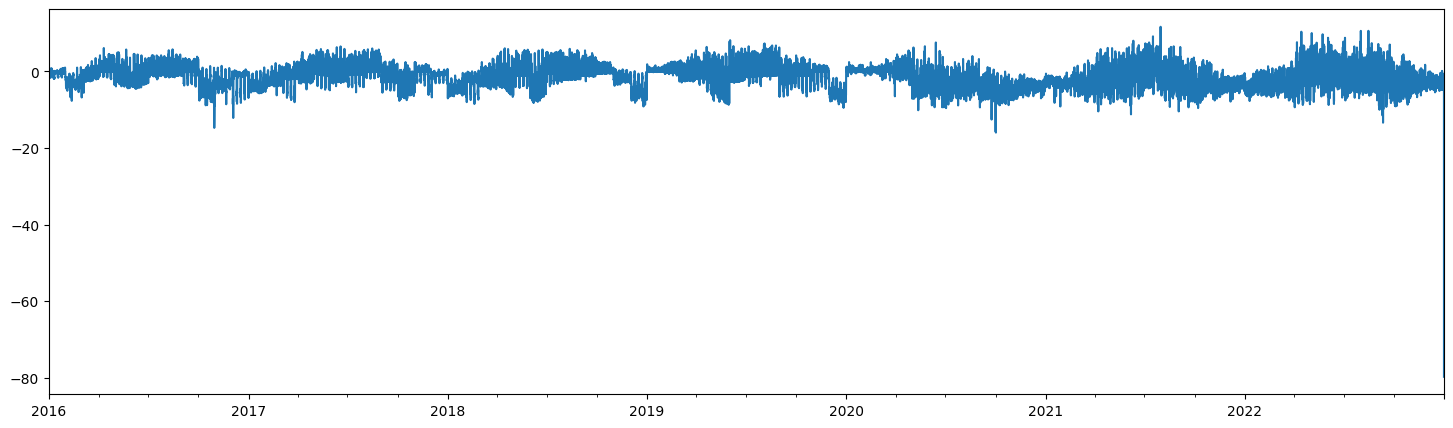

In [12]:
diff = electricity_impact['df']['sum'] - oelectricity_impact['df']['sum']
diff.plot(figsize=(18, 5))

In [13]:
diff.describe()

count    61368.000000
mean        -1.676876
std          2.542920
min        -79.773452
25%         -3.322639
50%         -1.601104
75%         -0.028567
max         11.646959
Name: sum, dtype: float64

<Axes: >

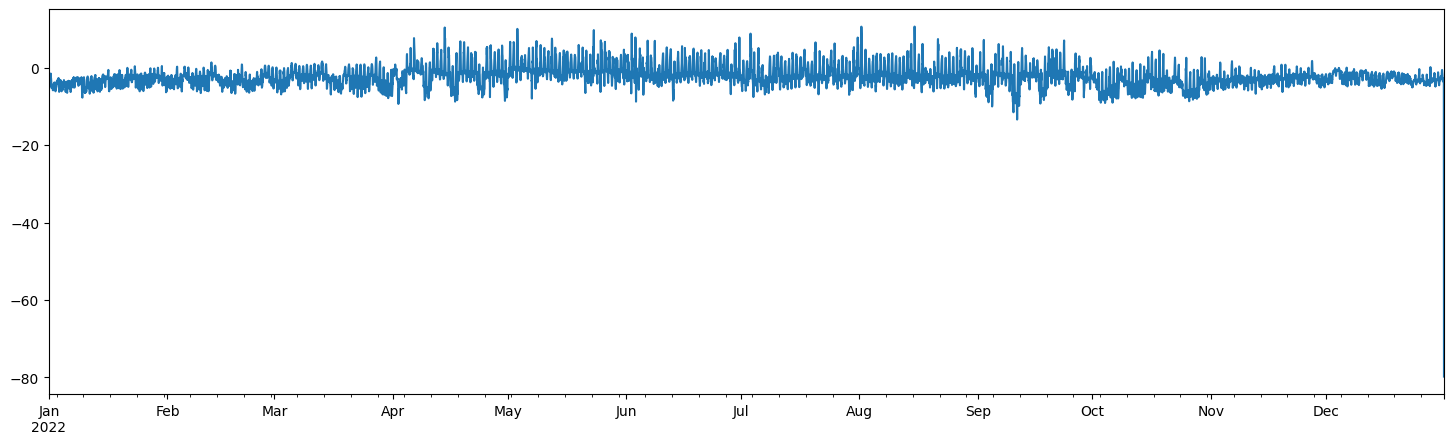

In [14]:
diff.loc['2022'].plot(figsize=(18, 5))

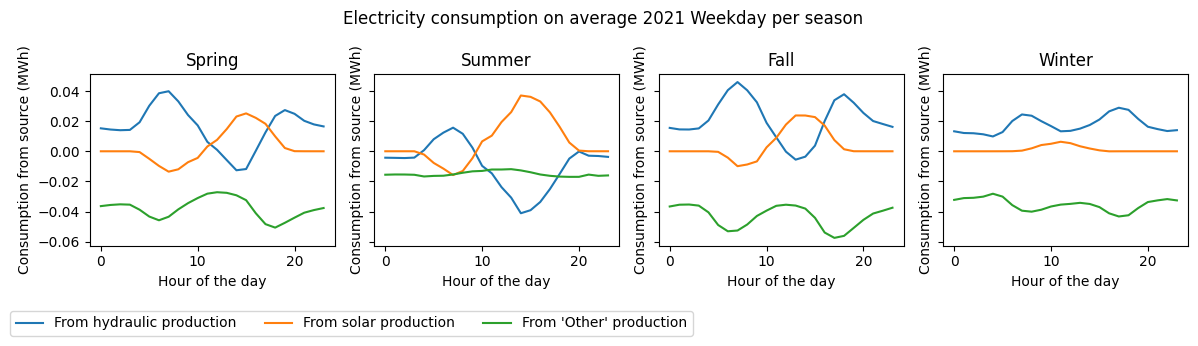

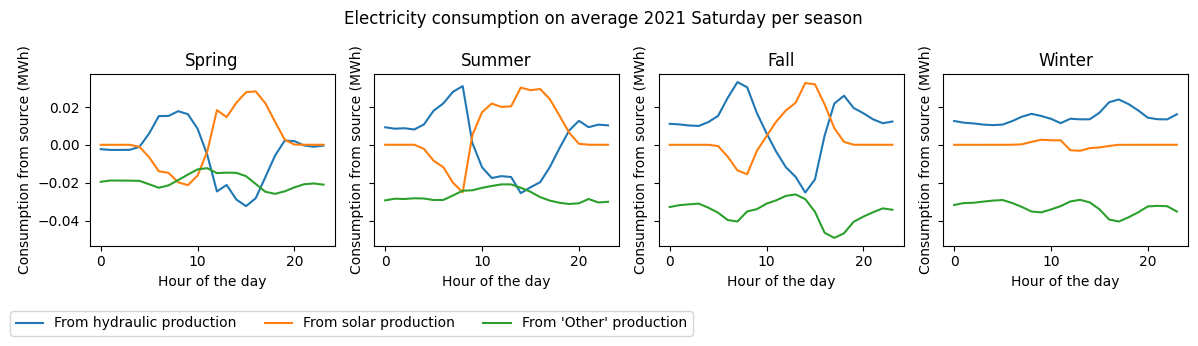

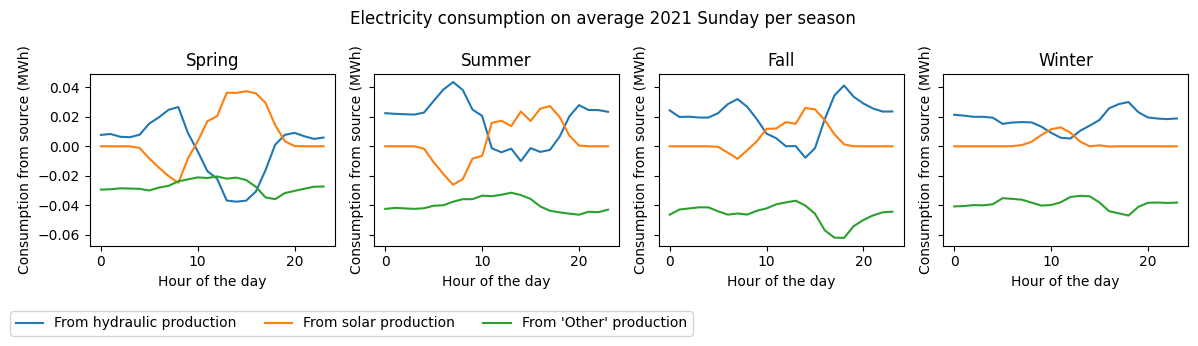

In [59]:
#data = electricity_impact['df'][countries].loc[start:end].copy()
countries = ['hydro', 'solar', 'residual']
start = '2021-01-01'
end = '2021-12-31'
years_label = '2021'
season_names = {2: 'Spring', 3: 'Summer', 4: 'Fall', 1: 'Winter'}
colormap = {
    'sum': 'lightgrey',
    'CH': '#1f77b4',
    'DE': '#c62728',
    'FR': '#2ca02c',
    'IT': '#9467bd',
    'AT': '#ff7f0e',
    'Other': '#e377c2'
}

# diff = electricity_mix['df']['sum'] - oelectricity_mix['df']['sum']
# diff_perc = electricity_mix['df']['sum'] * 100 / oelectricity_mix['df']['sum'] - 100
# print('Diff min', diff_perc.loc[start:end].min())
# print('Diff max', diff_perc.loc[start:end].max())
#diff = diff_perc

diff_sol = electricity_mix['raw_df']['Solar_CH'] - oelectricity_mix['raw_df']['Solar_CH']
diff_wind = electricity_mix['raw_df']['Wind_Onshore_CH'] - oelectricity_mix['raw_df']['Wind_Onshore_CH']
diff_hydro = electricity_mix['raw_df']['Hydro_Pumped_Storage_CH'] - oelectricity_mix['raw_df']['Hydro_Pumped_Storage_CH'] + electricity_mix['raw_df']['Hydro_Water_Reservoir_CH'] - oelectricity_mix['raw_df']['Hydro_Water_Reservoir_CH'] + electricity_mix['raw_df']['Hydro_Run-of-river_and_poundage_CH'] - oelectricity_mix['raw_df']['Hydro_Run-of-river_and_poundage_CH'] + electricity_mix['raw_df']['Residual_Hydro_Run-of-river_and_poundage_CH'] - oelectricity_mix['raw_df']['Residual_Hydro_Run-of-river_and_poundage_CH'] + electricity_mix['raw_df']['Residual_Hydro_Water_Reservoir_CH'] - oelectricity_mix['raw_df']['Residual_Hydro_Water_Reservoir_CH']
diff_residual = electricity_mix['raw_df']['Residual_Other_CH'] - oelectricity_mix['raw_df']['Residual_Other_CH']

data = diff_hydro.loc[start:end].copy()
data = pd.DataFrame(data, columns=['hydro'])

data['solar'] = diff_sol.loc[start:end].copy()
#data['wind'] = diff_wind.loc[start:end].copy()
data['residual'] = diff_residual.loc[start:end].copy()

#print(data)
data['Season'] = [date.month % 12 // 3 + 1 for date in data.index]
data['Season'] = data['Season'].map(season_names)
data['DayOfWeek'] = [0 if date.weekday() < 5 else 1 if date.weekday() == 5 else 2 for date in data.index]
grouped_data = data.groupby('Season')

season_labels = [*season_names.values()]
weekdays = ['Weekday', 'Saturday', 'Sunday']
for k in range(len(weekdays)):
    fig, ax = plt.subplots(1, len(season_labels), sharey=True, figsize=(12, 3))
    for i in range(len(countries)):
        seasonal_data = [grouped_data.get_group(season) for season in season_labels]
        seasonal_data = [s[s['DayOfWeek'] == k][data.columns[i]] for s in seasonal_data]
        plot_typical_days(seasonal_data, season_labels,
                          f'Electricity consumption on average {years_label} {weekdays[k]}',
                          'Consumption from source (MWh)',
                          fig=fig, ax=ax)
    #for i in range(len(season_labels)):
     #   for j in range(len(ax[i].get_lines())):
      #      ax[i].get_lines()[j].set_color(colormap[countries[j]])
    fig.legend(['From hydraulic production', 'From solar production', 'From \'Other\' production'], loc='upper left', ncol=4,
               bbox_to_anchor=(0, 0))
    if k == 0:
        plt.savefig('figures/tmd_cons_diff.png', dpi=300, bbox_inches='tight')
    plt.show()

Diff min -20.82744949472169
Diff max 18.35662124732353


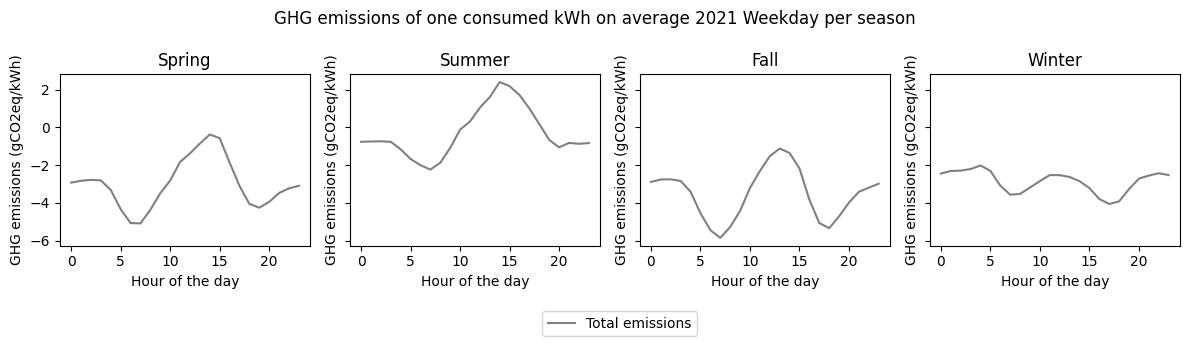

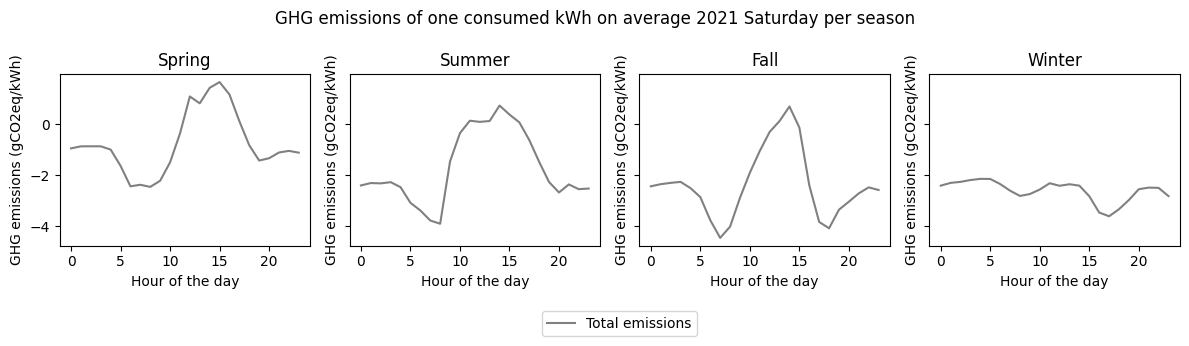

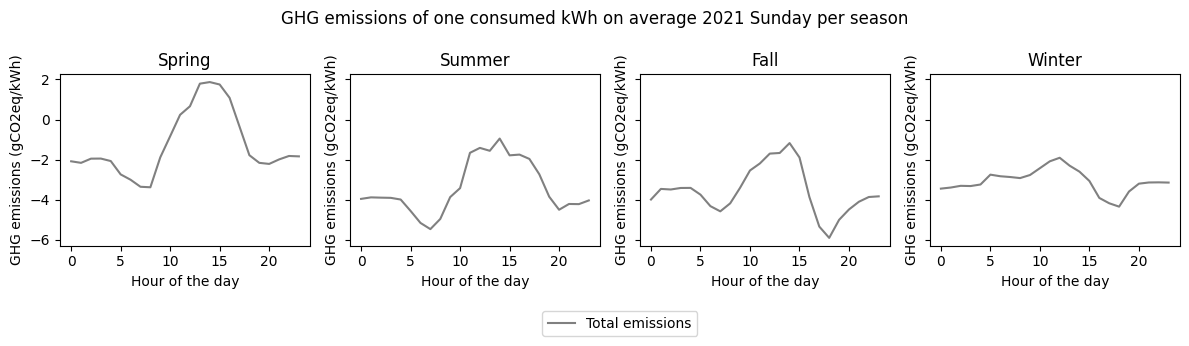

In [56]:
#data = electricity_impact['df'][countries].loc[start:end].copy()
countries = ['sum']#'hydro', 'solar', 'sum', 'residual']
start = '2021-01-01'
end = '2021-12-31'
years_label = '2021'
season_names = {2: 'Spring', 3: 'Summer', 4: 'Fall', 1: 'Winter'}
colormap = {
    'sum': 'lightgrey',
    'CH': '#1f77b4',
    'DE': '#c62728',
    'FR': '#2ca02c',
    'IT': '#9467bd',
    'AT': '#ff7f0e',
    'Other': '#e377c2'
}

diff = electricity_impact['df']['sum'] - oelectricity_impact['df']['sum']
diff_perc = electricity_impact['df']['sum'] * 100 / oelectricity_impact['df']['sum'] - 100
print('Diff min', diff_perc.loc[start:end].min())
print('Diff max', diff_perc.loc[start:end].max())
#diff = diff_perc

diff_sol = electricity_impact['raw_df']['Solar_CH'] - oelectricity_impact['raw_df']['Solar_CH']
diff_hydro = electricity_impact['raw_df']['Hydro_Pumped_Storage_CH'] - oelectricity_impact['raw_df']['Hydro_Pumped_Storage_CH'] + electricity_impact['raw_df']['Hydro_Water_Reservoir_CH'] - oelectricity_impact['raw_df']['Hydro_Water_Reservoir_CH'] + electricity_impact['raw_df']['Hydro_Run-of-river_and_poundage_CH'] - oelectricity_impact['raw_df']['Hydro_Run-of-river_and_poundage_CH'] + electricity_impact['raw_df']['Residual_Hydro_Run-of-river_and_poundage_CH'] - oelectricity_impact['raw_df']['Residual_Hydro_Run-of-river_and_poundage_CH'] + electricity_impact['raw_df']['Residual_Hydro_Water_Reservoir_CH'] - oelectricity_impact['raw_df']['Residual_Hydro_Water_Reservoir_CH']
diff_residual = electricity_impact['raw_df']['Residual_Other_CH'] - oelectricity_impact['raw_df']['Residual_Other_CH']

data = diff_hydro.loc[start:end].copy()
data = pd.DataFrame(data, columns=['hydro'])

data['solar'] = diff_sol.loc[start:end].copy()
data['sum'] = diff.loc[start:end].copy()
data['residual'] = diff_residual.loc[start:end].copy()

data = diff.loc[start:end].copy()
data = pd.DataFrame(data, columns=['sum'])

#print(data)
data['Season'] = [date.month % 12 // 3 + 1 for date in data.index]
data['Season'] = data['Season'].map(season_names)
data['DayOfWeek'] = [0 if date.weekday() < 5 else 1 if date.weekday() == 5 else 2 for date in data.index]
grouped_data = data.groupby('Season')

season_labels = [*season_names.values()]
weekdays = ['Weekday', 'Saturday', 'Sunday']
for k in range(len(weekdays)):
    fig, ax = plt.subplots(1, len(season_labels), sharey=True, figsize=(12, 3))
    for i in range(len(countries)):
        seasonal_data = [grouped_data.get_group(season) for season in season_labels]
        seasonal_data = [s[s['DayOfWeek'] == k][data.columns[i]] for s in seasonal_data]
        #print('data', seasonal_data)
        plot_typical_days(seasonal_data, season_labels,
                          f'GHG emissions of one consumed kWh on average {years_label} {weekdays[k]}',
                          'GHG emissions (gCO2eq/kWh)',
                          fig=fig, ax=ax)
    for i in range(len(season_labels)):
        for j in range(len(ax[i].get_lines())):
            ax[i].get_lines()[j].set_color('gray')
    fig.legend(['Total emissions'], loc='upper left', ncol=4,
               bbox_to_anchor=(0.45, 0))
    if k == 0:
        plt.savefig('figures/tmd_gwp_diff.png', dpi=300, bbox_inches='tight')
    plt.show()